In [2]:
# !pip install tensorflow_datasets==4.3

In [3]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
from cv2 import cv2
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow

ModuleNotFoundError: No module named 'tensorflow_datasets'

In [2]:
# constants
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
IMG_SIZE = 256

In [2]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'deep_weeds',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)


NameError: name 'tfds' is not defined

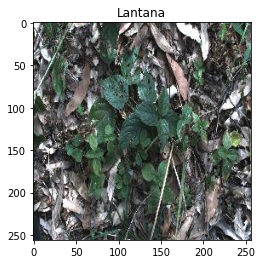

In [5]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [10]:
# helpers
def visualize(original, augmented):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(original)

  plt.subplot(1,2,2)
  plt.title('Augmented image')
  plt.imshow(augmented)

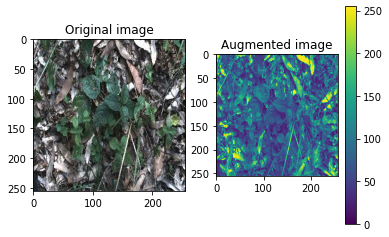

In [ ]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))
_ = plt.colorbar()

In [3]:
(train_datasets, validation_datasets, test_datasets), metadata = tfds.load(
    'deep_weeds',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

In [21]:
def resize_and_rescale(image, label):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])
  image = (image / 255.0)
  return image, label

# image augmentation function
def augment(image_label, seed):
  image, label = image_label
  image, label = resize_and_rescale(image, label)
  image = tf.image.rgb_to_grayscale(image)
  # image = tf.expand_dims(image, 0)
  # image = tf.image.sobel_edges(image)
  return image, label

In [22]:
counter = tf.data.experimental.Counter()
train_ds = tf.data.Dataset.zip((train_datasets, (counter, counter)))
val_ds = tf.data.Dataset.zip((validation_datasets, (counter, counter)))
test_ds = tf.data.Dataset.zip((test_datasets, (counter, counter)))

In [23]:
train_ds = (
    train_ds
    .shuffle(1000)
    .map(augment, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

val_ds = (
    val_ds
    .map(augment, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

In [24]:
test_ds = (
    test_ds
    .map(augment, num_parallel_calls=AUTOTUNE)
    .prefetch(AUTOTUNE)
)

(256, 256, 1)


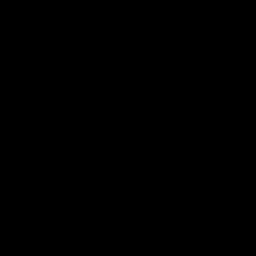

In [28]:
image, label = next(iter(train_ds))
print(image.shape)
x = np.asarray(image[:, :, :])  #  Sobel_X
cv2_imshow(x)

In [25]:
sobel, label = next(iter(train_ds))
print(sobel.shape)
sobel_x = np.asarray(sobel[0, :, :, :, 0])  #  Sobel_X
sobel_y = np.asarray(sobel[0, :, :, :, 1])  #  Sobel_Y
cv2_imshow(sobel_x)
cv2_imshow(sobel_y)

(256, 256, 1)


InvalidArgumentError: ignored

In [16]:
print(next(iter(train_ds)))

(<tf.Tensor: shape=(1, 256, 256, 1, 2), dtype=float32, numpy=
array([[[[[ 2.98023224e-08,  0.00000000e+00]],

         [[-5.96046448e-08, -6.04030490e-01]],

         [[ 0.00000000e+00, -5.84079027e-01]],

         ...,

         [[ 5.96046448e-08, -4.72703457e-01]],

         [[ 0.00000000e+00,  2.56248564e-01]],

         [[ 0.00000000e+00,  0.00000000e+00]]],


        [[[-2.17658353e+00,  0.00000000e+00]],

         [[-1.52291918e+00,  4.96336818e-02]],

         [[-5.43266416e-01, -2.58090436e-01]],

         ...,

         [[-5.52547216e-01, -8.45070183e-02]],

         [[-1.08560145e-01,  3.12039196e-01]],

         [[-5.27693927e-02,  0.00000000e+00]]],


        [[[-5.39152145e-01,  0.00000000e+00]],

         [[-5.56009173e-01,  6.86441123e-01]],

         [[-1.03496790e-01,  5.37267148e-01]],

         ...,

         [[-1.87594891e-02,  5.61804295e-01]],

         [[ 1.23339325e-01,  2.51813829e-01]],

         [[ 7.32314587e-03,  0.00000000e+00]]],


        ...,


        

In [ ]:
train_ds_numpy = [(example.numpy().flatten(), label.numpy()) for example, label in train_ds if label < 8]
# y_train = filter_negatives([label.numpy() for example, label in train_ds])

test_ds_numpy = [(example.numpy().flatten(), label.numpy()) for example, label in test_ds if label < 8]
# y_test = filter_negatives([label.numpy() for example, label in test_ds])


In [ ]:
x_train = [example for example, label in train_ds_numpy]
y_train = [label for example, label in train_ds_numpy]

x_test = [example for example, label in test_ds_numpy]
y_test = [label for example, label in test_ds_numpy]

In [ ]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print(x_train[0])
print(x_train[0].shape)
print(y_train[0])

print(x_test[0])
print(x_test[0].shape)
print(y_test[0])

[0.61866474 0.5725714  0.54955804 ... 0.30862513 0.328231   0.33607334]
(65536,)
0
[0.29672825 0.09282706 0.18301412 ... 0.47797218 0.57992274 0.48581454]
(65536,)
6


In [ ]:
print(knn.predict([x_test[0]]))
print(y_test[0])

[1]
6


In [ ]:
print(knn.score(x_test, y_test))